In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
# constants
NUM_ACTIONS = 10
NUM_GAMES = 2000
NUM_TRIALS_PER_GAME = 1000
NUM_SAMPLES_PLOTTING = 1000 # for plotting purposes

In [12]:
# sample a list of means q*(a) for each action
def sample_means():
    mu, sigma = 0, 1
    return np.random.normal(mu, sigma, NUM_ACTIONS)

# def sample_distributions(sample_means):
#     return list(map(lambda mu: np.random.normal(mu, 1, NUM_SAMPLES_PLOTTING), sample_means))
    
    
means = sample_means()
# sample_distributions = sample_distributions(sample_means)

print("Sample means: ", means)
# print("First sample distribution: ", sample_distributions[0])

Sample means:  [ 1.32955661  2.12162906  0.75943691  0.5362642   0.19751922  1.75722168
 -0.85961684  0.15978948  0.85127436 -0.13640053]


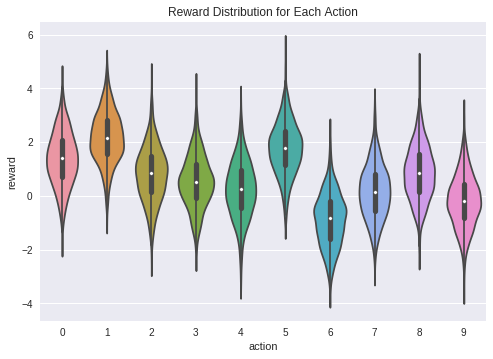

In [13]:
# illustrate each action's distribution
# ax = sns.distplot(sample_means).set_title("moo")

rows = []
for action in range(NUM_ACTIONS):
    for sample in range(NUM_SAMPLES_PLOTTING):
        row = [action, np.random.normal(means[action], 1)]
        rows.append(row)

df = pd.DataFrame(data=rows, columns=['action', 'reward'])


ax = sns.violinplot(x="action", y="reward", data=df).set_title("Reward Distribution for Each Action")

In [15]:
# create separate games (sample means)
games = []
for i in range(NUM_GAMES):
    games.append(sample_means())
    
games[0]

array([ 0.64958162,  0.02512152, -1.64529089,  1.13685212, -0.64938036,
       -0.07466525,  0.36691102,  0.35859023,  1.2424507 ,  0.76627559])

In [18]:
# now define an RL agent that is greedy (1-e) of the time
class Agent:
    def __init__(self, e=0):
        self.e = e
        action_mean_estimates = np.zeros(NUM_ACTIONS)
        # cumulative rewards per action for incremental update of sample means
        reward_running_sums = np.zeros(NUM_ACTIONS)
    
    def choose_action(self, sample_means):
        # take action with greatest reward
        action_index = np.max(self.action_mean_estimates)
        # with prob e choose a random one instead
        if e != 0 and np.random.uniform() < e:
            action_index = np.random.randint(low, high=NUM_ACTIONS)
            
        # sample reward from chosen action
        action_reward = np.random.normal(sample_means[action_index])
        
        # update that action's reward estimate and sum from incremental update
        
        reward_running_sums[action_index] = reward_running_sums[action_index] + action_reward
    
    
greedy = Agent()